In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

In [2]:
# Create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Create automap
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [4]:
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [5]:
# Create session for query
session = Session(engine)

In [6]:
meas_first = session.query(Measurements).first()
meas_first

In [7]:
meas_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xd015d50>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

# Precipitation Analysis

In [8]:
# Query database for Precipitation information for the last 12 months
rain = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= "2016-08-23").group_by(Measurements.date).all()
rain

[('2016-08-23', 0.7),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.12),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.03),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.44),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.15),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.23),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.33),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.05),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.8

In [9]:
# Create Data Frame using Pandas for the last 12 months of Precipitation
rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2016-08-23,0.70
1,2016-08-24,1.45
2,2016-08-25,0.11
3,2016-08-26,0.01
4,2016-08-27,0.12


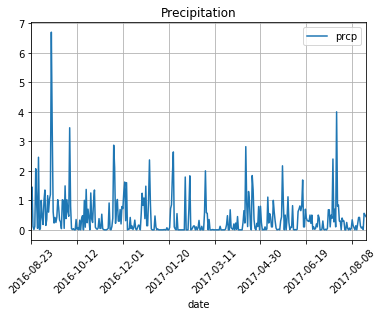

In [10]:
# Plot the Precipitation
rain_df.plot(x= 'date', y = 'prcp' , rot = 45)
plt.title("Precipitation")
plt.grid()
plt.show()

In [11]:
# Display summary statistics of Precipitation
rain_stats = rain_df.describe()
rain_stats

,prcp
count,366.000000
mean,0.414536
std,0.690504
min,0.000000
25%,0.000000
50%,0.125000
75%,0.550000
max,6.700000


# Station Analysis

In [12]:
# Set stations_first as a variable
stations_first = session.query(Stations).first()
stations_first

In [13]:
# Show the first row of the stations table
stations_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xd54c810>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'location': None,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [14]:
# Most active stations
active_station = session.query(Measurements.station,func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()      
active_station

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [15]:
# Most active station
most_active = active_station[0][0]
most_active

'USC00519281'

In [16]:
# Temperature Observation Data for most active
tobs = session.query(Measurements.tobs).filter(Measurements.date >= "2016-08-23", Measurements.station == most_active).all()      
tobs

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [17]:
# Temperature Observation Data (tobs) in Data Frame
tobs_df = pd.DataFrame(tobs)
tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


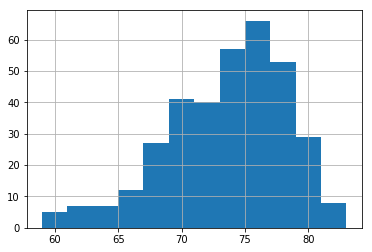

In [18]:
# Plot Temperature Observation Data (tobs)
plt.hist(tobs_df["tobs"], bins=12)
plt.grid()
plt.show()

# Temperature Analysis

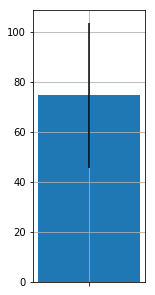

In [19]:
def calc_temps(start_date, end_date):
    trip_dates = session.query(Measurements.date, Measurements.tobs).filter(Measurements.date >= start_date, Measurements.date <= end_date).all()
    trip_dates_df = pd.DataFrame(trip_dates)
    max_temp = trip_dates_df["tobs"].max()
    min_temp = trip_dates_df["tobs"].min()
    mean_temp = trip_dates_df["tobs"].mean()
    plt.figure(figsize=(2,5))
    plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
    plt.grid()
    plt.show()
calc_temps("2016-07-04", "2017-07-04")